# Lectura y preprocesamiento de datos

In [1]:
import pandas as pd
import datetime
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [2]:
pd.set_option('display.max_rows',None) 
pd.set_option('display.max_columns', None) 

In [3]:
data = pd.read_excel("data.xlsb")
data["Fecha_Reporte"] = data["Fecha_Reporte"].apply(lambda x : pd.to_datetime("1899-12-30") + datetime.timedelta(days=x))
data["Fecha_Ocurrencia"] = data["Fecha_Ocurrencia"].apply(lambda x : pd.to_datetime("1899-12-30") + datetime.timedelta(days=x))
data["Fecha_Pago"] = data["Fecha_Pago"].apply(lambda x : pd.to_datetime("1899-12-30") + datetime.timedelta(days=x))

In [4]:
aux = data
aux["Fecha_Reporte"] = aux.Fecha_Reporte.apply(lambda x: pd.Timestamp(x.year,x.month,1))
aux["Fecha_Ocurrencia"] = aux.Fecha_Ocurrencia.apply(lambda x: pd.Timestamp(x.year,x.month,1)) 
aux["Fecha_Pago"] = aux.Fecha_Pago.apply(lambda x : pd.Timestamp(x.year,x.month,1))
aux = aux.groupby(["Fecha_Ocurrencia","Fecha_Pago"])["Importe USD"].sum().reset_index()

In [5]:
data.shape

(4974, 6)

In [6]:
aux.shape

(1897, 3)

In [7]:
fecha_inicial_pago = aux["Fecha_Pago"].min()
fecha_final_pago = aux["Fecha_Pago"].max()
rango_fechas_pago = pd.date_range(fecha_inicial_pago, fecha_final_pago, freq="M")

fecha_inicial_ocurrencia = aux["Fecha_Ocurrencia"].min()
fecha_final_ocurrencia = aux["Fecha_Ocurrencia"].max()
rango_fechas_ocurrencia = pd.date_range(fecha_inicial_ocurrencia, fecha_final_ocurrencia, freq="M")

In [8]:
indice1 = pd.DataFrame({"Fecha_Pago" :pd.Series(rango_fechas_pago).apply(lambda x: pd.Timestamp(x.year,x.month,1))})
indice2 = pd.DataFrame({"Fecha_Ocurrencia" :pd.Series(rango_fechas_ocurrencia).apply(lambda x: pd.Timestamp(x.year,x.month,1))})
indice = indice2.merge(indice1, how = 'cross')
indice = indice[indice.Fecha_Pago > indice.Fecha_Ocurrencia]

In [9]:
aux.head()

,Fecha_Ocurrencia,Fecha_Pago,Importe USD
0,2008-09-01,2009-01-01,55.33
1,2008-09-01,2009-06-01,6.34
2,2008-09-01,2012-05-01,19.86
3,2008-11-01,2009-01-01,37.61
4,2008-11-01,2010-01-01,142.27


In [10]:
aux = aux.merge(indice, how = 'right').replace({np.nan : 0})
aux.shape

(14529, 3)

In [11]:
aux.head()

,Fecha_Ocurrencia,Fecha_Pago,Importe USD
0,2008-09-01,2009-01-01,55.33
1,2008-09-01,2009-02-01,0.00
2,2008-09-01,2009-03-01,0.00
3,2008-09-01,2009-04-01,0.00
4,2008-09-01,2009-05-01,0.00


In [12]:
X = aux[["Fecha_Ocurrencia","Fecha_Pago", "Importe USD"]]
y = aux[["Importe USD"]]

In [13]:
X["anno_pago"] = X["Fecha_Pago"].apply(lambda x : x.year)
X["Mes_pago"] = X["Fecha_Pago"].apply(lambda x : x.month)
X["anno_Oc"] = X["Fecha_Ocurrencia"].apply(lambda x : x.year)
X["Mes_Oc"] = X["Fecha_Ocurrencia"].apply(lambda x : x.month)

In [14]:
pd.pivot_table(X,values = ["Importe USD"], index = ["anno_Oc"],columns = ["anno_pago"], aggfunc= np.sum, fill_value = "")

Importe USD                                                        \
anno_pago        2009       2010       2011       2012       2013      2014   
anno_Oc                                                                       
2008           497.36     142.27        0.0      19.86        0.0       0.0   
2009          6622.28   20675.87    14682.1        0.0        0.0       0.0   
2010                   384653.83   851233.3    1763.73        0.0    236.74   
2011                              146324.97  250533.04   60288.44  77667.87   
2012                                         373085.24  247083.41  27333.18   
2013                                                    797239.82  602053.4   
2014                                                                93467.4   
2015                                                                          
2016                                                                          
2017                                                                          
2018                                                                          
2019                                                                          
2020                                                                          
2021                                                                          
2022                                                                          

                                                                       \
anno_pago       2015        2016         2017        2018        2019   
anno_Oc                                                                 
2008             0.0         0.0          0.0         0.0         0.0   
2009             0.0         0.0          0.0         0.0         0.0   
2010             0.0         0.0          0.0         0.0         0.0   
2011        93357.65         0.0          0.0         0.0         0.0   
2012         5147.57       99.79          0.0         0.0         0.0   
2013       486552.82     5337.53      2492.31         0.0     6593.62   
2014        135145.1     2767.82       479.72      586.28         0.0   
2015       298261.79  1747868.02      26900.2  1000222.32      2195.3   
2016                  3175482.19    2093204.0   147955.72      2145.1   
2017                              16389618.18  7218313.35   860750.24   
2018                                           1014029.34  1654157.06   
2019                                                       4457123.83   
2020                                                                    
2021                                                                    
2022                                                                    

                                              
anno_pago        2020       2021        2022  
anno_Oc                                       
2008              0.0        0.0        0.00  
2009              0.0        0.0        0.00  
2010              0.0        0.0        0.00  
2011              0.0    10167.2        0.00  
2012              0.0        0.0        0.00  
2013              0.0    3946.54        0.00  
2014              0.0    4203.89        0.00  
2015            268.1    9613.03        0.00  
2016           620.06    2754.95     1208.91  
2017        364879.07   182544.9      637.73  
2018        706926.41  203696.81   885306.10  
2019       4327219.58  516082.01   112861.48  
2020        374421.41  621776.42   126324.94  
2021                    581153.2  1058429.37  
2022                               688171.05

In [15]:
pd.pivot_table(X ,values = ["Importe USD"], index = ["anno_Oc","Mes_Oc"],columns = ["anno_pago", "Mes_pago"], aggfunc= np.sum, fill_value = "")

Importe USD                                                 \
anno_pago             2009                                                  
Mes_pago                1       2       3    4    5       6       7    8    
anno_Oc Mes_Oc                                                              
2008    9            55.33     0.0     0.0  0.0  0.0    6.34     0.0  0.0   
        10             0.0     0.0     0.0  0.0  0.0     0.0     0.0  0.0   
        11           37.61     0.0     0.0  0.0  0.0     0.0     0.0  0.0   
        12             0.0  398.08     0.0  0.0  0.0     0.0     0.0  0.0   
2009    1                   946.67  737.46  0.0  0.0     0.0     0.0  0.0   
        2                              0.0  0.0  0.0     0.0     0.0  0.0   
        3                                   0.0  0.0     0.0  206.98  0.0   
        4                                        0.0     0.0     0.0  0.0   
        5                                             110.22   70.65  0.0   
        6                                                        0.0  0.0   
        7                                                             0.0   
        8                                                                   
        9                                                                   
        10                                                                  
        11                                                                  
        12                                                                  
2010    1                                                                   
        2                                                                   
        3                                                                   
        4                                                                   
        5                                                                   
        6                                                                   
        7                                                                   
        8                                                                   
        9                                                                   
        10                                                                  
        11                                                                  
        12                                                                  
2011    1                                                                   
        2                                                                   
        3                                                                   
        4                                                                   
        5                                                                   
        6                                                                   
        7                                                                   
        8                                                                   
        9                                                                   
        10                                                                  
        11                                                                  
        12                                                                  
2012    1                                                                   
        2                                                                   
        3                                                                   
        4                                                                   
        5                                                                   
        6                                                                   
        7                                                                   
        8                                                                   
        9  

In [16]:
X["Mes_pago_sin"] = X["Mes_pago"].apply(lambda x : np.sin(2*np.pi*x/12))
X["Mes_pago_cos"] = X["Mes_pago"].apply(lambda x : np.cos(2*np.pi*x/12))

X["Mes_Oc_sin"] = X["Mes_Oc"].apply(lambda x : np.sin(2*np.pi*x/12))
X["Mes_Oc_cos"] = X["Mes_Oc"].apply(lambda x : np.cos(2*np.pi*x/12))

In [17]:
#El año lo estandarizamos, pero comenzando desde 0.
ap_min = X.anno_pago.min() ; ap_max = X.anno_pago.max() 
ao_min = X.anno_Oc.min() ; ao_max = X.anno_Oc.max()

X["anno_pago"] = (X["anno_pago"] - ap_min) / (ap_max - ap_min)

X["anno_Oc"] = (X["anno_Oc"] - ao_min) / (ao_max - ao_min)

In [18]:
columns = ["anno_pago", "anno_Oc", "Mes_pago_sin", "Mes_pago_cos", "Mes_Oc_sin", "Mes_Oc_cos", "Importe USD"]
# columns = ["anno", "Mes_sin", "Mes_cos"]   #, "Importe USD"]

In [19]:
#Normalizamos los valores de y
y_mean = y.values.mean()
y_std = y.values.std()
y = (y - y_mean) / y_std
X["Importe USD"] = (X["Importe USD"] - y_mean) / y_std

In [20]:
X.anno_pago.unique()

array([0.        , 0.07692308, 0.15384615, 0.23076923, 0.30769231,
       0.38461538, 0.46153846, 0.53846154, 0.61538462, 0.69230769,
       0.76923077, 0.84615385, 0.92307692, 1.        ])

In [21]:
d_cols = ["Fecha_Ocurrencia", "Fecha_Pago", "Importe USD", "anno_pago", "Mes_pago", "anno_Oc", "Mes_Oc"]

In [25]:
#Creamos el X_train e y_train utilizando secuencias de un largo fijo
sequence_length = 30
X_train = []
y_train = []
X_test = []
y_test = []
D_test = []
D_train = []

for i in range(sequence_length, len(X)):
    if ( (X.Fecha_Pago[i] > pd.Timestamp(2021,11,10)) | (X.Fecha_Ocurrencia[i].year == 2022)):
        X_test.append(X.iloc[i - sequence_length : i][columns].values)
        y_test.append(y.iloc[i])
        D_test.append(X.iloc[i][d_cols].values)
    else:
        X_train.append(X.iloc[i - sequence_length : i][columns].values)
        y_train.append(y.iloc[i])
        D_train.append(X.iloc[i][d_cols].values)

    
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

D_test = pd.DataFrame(D_test, columns = d_cols)
D_test["Importe USD"] = D_test["Importe USD"].apply(lambda x: x*y_std + y_mean)
D_test["anno_pago"] = D_test.anno_pago.apply(lambda x: x*(ap_max-ap_min) + ap_min)
D_test["anno_Oc"] = D_test.anno_Oc.apply(lambda x: x*(ao_max-ao_min) + ao_min)

D_train = pd.DataFrame(D_train, columns = d_cols)
D_train["Importe USD"] = D_train["Importe USD"].apply(lambda x: x*y_std + y_mean)
D_train["anno_pago"] = D_train.anno_pago.apply(lambda x: x*(ap_max-ap_min) + ap_min)
D_train["anno_Oc"] = D_train.anno_Oc.apply(lambda x: x*(ao_max-ao_min) + ao_min)

In [26]:
X_train.shape, y_train.shape

((12525, 30, 7), (12525, 1))

In [27]:
X_test.shape, y_test.shape

((1974, 30, 7), (1974, 1))

In [28]:
n_steps = 30
n_features = 7

# LSTM + DROPOUT

In [29]:
def lstm_dropout_model(n_lstm, sequence_length = 30):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(n_lstm,input_shape=(n_steps, n_features)))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(1))

    model.compile(
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
        loss = tf.keras.losses.MeanSquaredError(),        
    )

    return model

BEST LOSS: 0.1659550964832306


Text(0.5, 1.0, 'val_loss vs iteration')

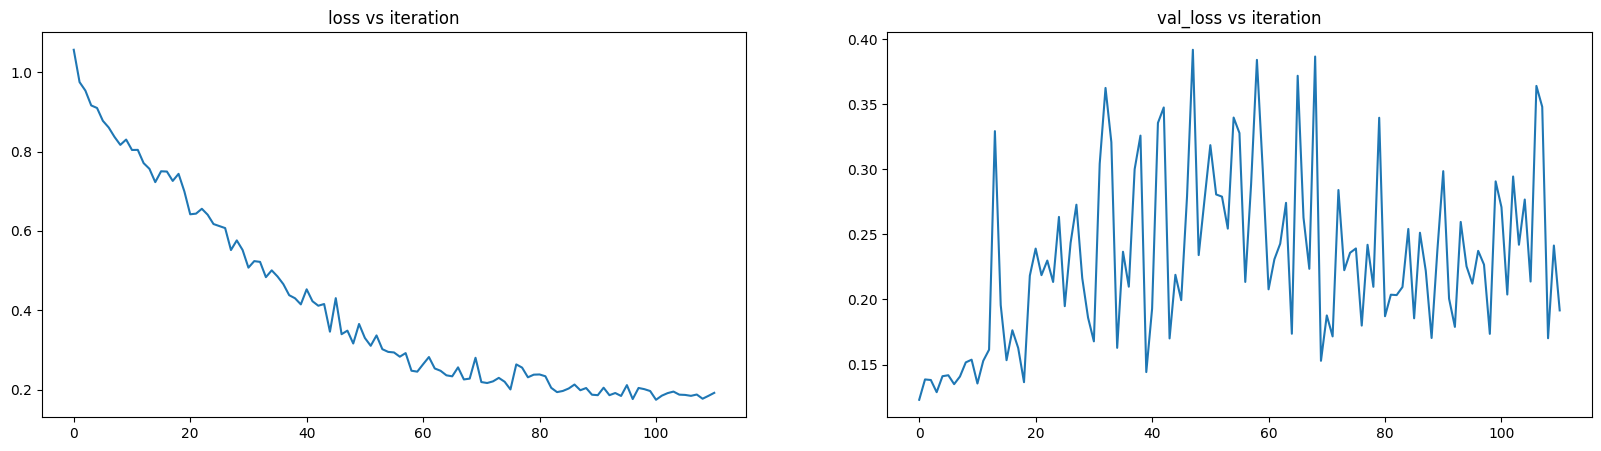

In [30]:
best_model = None
best_hist = None
best_loss = float("inf")
best_val_loss = float("inf")
loss = float("inf")

VAL_LOSS = list()
LOSS = list()

sizes = [8, 16, 32, 64, 128]

for i in range(2):
    print(f"iteration actual: {i+1}\n")
    
    model = lstm_dropout_model(64)#sizes[i % len(sizes)])
    hist = model.fit(
                    X_train, y_train,
                    epochs = 1000,
                    validation_data = (X_test,y_test),
                    batch_size = 32,
                    callbacks = [tf.keras.callbacks.EarlyStopping("loss", patience = 10, restore_best_weights = True)])

    loss = model.evaluate(X_train, y_train, verbose = 0)
    val_loss = model.evaluate(X_test,y_test, verbose = 0)
    LOSS.append(loss)
    VAL_LOSS.append(val_loss)
      
    if loss < best_loss:
        best_model = model
        best_loss = loss
        best_hist = hist
        best_val_loss = val_loss
    
    clear_output(wait=True)
    
    print(f"BEST LOSS: {best_loss}")
    print(f"Iteration {i+1} - Loss: {loss} \n")
    
    fig, (p1,p2) = plt.subplots(1,2, figsize = (20,5) )
    p1.plot(hist.history["loss"])
    p1.set_title("loss vs iteration")
    p2.plot(hist.history["val_loss"])
    p2.set_title("val_loss vs iteration")
    
    display(plt.show())
    plt.close()
    
    print("\n\n")
    
clear_output(wait=True)

print(f"BEST LOSS: {best_loss}")

f,(ax1,ax2) = plt.subplots(1,2,figsize  = (20,5))
ax1.plot(best_hist.history["loss"]);
ax1.set_title("loss vs iteration")
ax2.plot(best_hist.history["val_loss"])
ax2.set_title("val_loss vs iteration")

In [31]:
dd = pd.DataFrame({"loss" : LOSS, "val_loss" : VAL_LOSS}).sort_values(by = 'loss')
dd.index.name = "iter"

dd

,loss,val_loss
iter,,
0,0.165955,0.270875
1,0.221053,0.299861


In [32]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                18432     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 18,497
Trainable params: 18,497
Non-trainable params: 0
_________________________________________________________________


In [33]:
y_pred = best_model.predict(X_test)

y_pred = y_pred*y_std + y_mean
y_pred = [y_pred[j][0] for j in range(len(y_pred))]

D_test["pred"] = y_pred

62/62 [==============================] - 1s 8ms/step


In [34]:
pd.pivot_table(D_test,values = ["Importe USD", "pred"], index = ["anno_Oc"],columns = ["anno_pago"], aggfunc= np.sum, fill_value = "")

Importe USD                       pred              
anno_pago      2021.0      2022.0         2021.0        2022.0
anno_Oc                                                       
2008.0            0.0        0.00   -4021.258789 -9.190834e+04
2009.0            0.0        0.00   -9242.904297 -2.388905e+05
2010.0            0.0        0.00   -3302.033936 -1.828537e+05
2011.0            0.0        0.00    3490.218018 -1.251889e+05
2012.0            0.0        0.00    11596.80957 -6.325799e+04
2013.0        1152.31        0.00   22934.443359  5.574734e+03
2014.0          72.16        0.00     36652.0625  7.683961e+04
2015.0            0.0        0.00   48910.109375  1.408495e+05
2016.0            0.0     1208.91   57748.476562  1.971651e+05
2017.0         107.26      637.73   69112.367188  2.639284e+05
2018.0         481.48   885306.10   68268.570312  3.199020e+06
2019.0       26372.82   112861.48  106667.523438  4.449106e+05
2020.0       32119.25   126324.94   96237.890625  4.970079e+05
2021.0        81829.5  1058429.37  119912.515625  1.161023e+06
2022.0                  688171.05                 1.053070e+06

In [ ]:
# pd.pivot_table(D_test,values = ["Importe USD"], index = ["anno_Oc","Mes_Oc"],columns = ["anno_pago", "Mes_pago"], aggfunc= np.sum, fill_value = "")

In [ ]:
# pd.pivot_table(D_test,values = ["pred"], index = ["anno_Oc","Mes_Oc"],columns = ["anno_pago", "Mes_pago"], aggfunc= np.sum, fill_value = "")

In [37]:
# best_model.save("LSTM_dropout_model_v2.h5")

# GRU + DROPOUT

In [38]:
def gru_dropout_model(n_lstm, sequence_length = 30):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.GRU(n_lstm,input_shape=(n_steps, n_features)))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(1))

    model.compile(
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
        loss = tf.keras.losses.MeanSquaredError(),
        #metrics = ['accuracy',]
    )

    return model

BEST LOSS: 0.153394877910614


Text(0.5, 1.0, 'val_loss vs iteration')

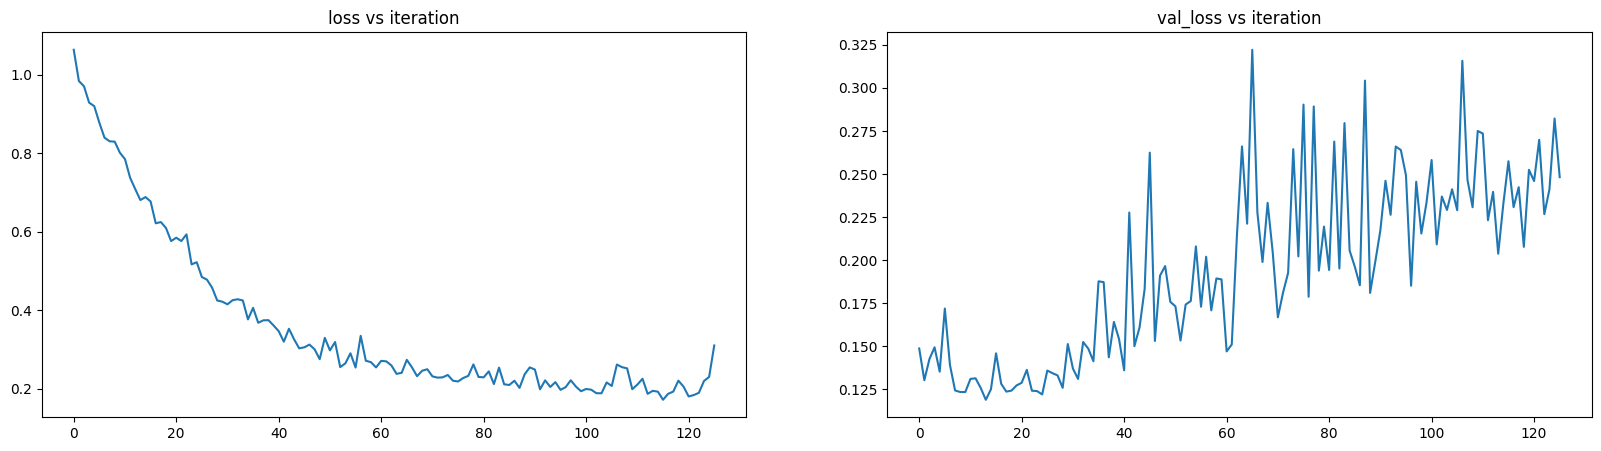

In [39]:
best_model = None
best_hist = None
best_loss = float("inf")
best_val_loss = float("inf")
loss = float("inf")

VAL_LOSS = list()
LOSS = list()

sizes = [8, 16, 32, 64, 128]

for i in range(2):
    print(f"iteration actual: {i+1}\n")
    
    model = gru_dropout_model(64) #sizes[i % len(sizes)])
    hist = model.fit(
                    X_train, y_train,
                    epochs = 1000,
                    validation_data = (X_test,y_test),
                    batch_size = 32,
                    callbacks = [tf.keras.callbacks.EarlyStopping("loss", patience = 10, restore_best_weights = True)])

    loss = model.evaluate(X_train, y_train, verbose = 0)
    val_loss = model.evaluate(X_test,y_test, verbose = 0)
    LOSS.append(loss)
    VAL_LOSS.append(val_loss)
      
    if loss < best_loss:
        best_model = model
        best_loss = loss
        best_hist = hist
        best_val_loss = val_loss
    
    clear_output(wait=True)
    
    print(f"BEST LOSS: {best_loss}")
    print(f"Iteration {i+1} - Loss: {loss} \n")
    
    fig, (p1,p2) = plt.subplots(1,2, figsize = (20,5) )
    p1.plot(hist.history["loss"])
    p1.set_title("loss vs iteration")
    p2.plot(hist.history["val_loss"])
    p2.set_title("val_loss vs iteration")
    
    display(plt.show())
    plt.close()
    
    print("\n\n")
    
clear_output(wait=True)

print(f"BEST LOSS: {best_loss}")

f,(ax1,ax2) = plt.subplots(1,2,figsize  = (20,5))
ax1.plot(best_hist.history["loss"]);
ax1.set_title("loss vs iteration")
ax2.plot(best_hist.history["val_loss"])
ax2.set_title("val_loss vs iteration")

In [40]:
dd = pd.DataFrame({"loss" : LOSS, "val_loss" : VAL_LOSS}).sort_values(by = 'loss')
dd.index.name = "iter"

dd

,loss,val_loss
iter,,
1,0.153395,0.257452
0,0.202307,0.232556


best_plot

In [41]:
best_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 64)                14016     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 14,081
Trainable params: 14,081
Non-trainable params: 0
_________________________________________________________________


In [42]:
y_pred = best_model.predict(X_test)

y_pred = y_pred*y_std + y_mean
y_pred = [y_pred[j][0] for j in range(len(y_pred))]

D_test["pred"] = y_pred

62/62 [==============================] - 1s 7ms/step


In [43]:
pd.pivot_table(D_test,values = ["Importe USD", "pred"], index = ["anno_Oc"],columns = ["anno_pago"], aggfunc= np.sum, fill_value = "")

Importe USD                       pred              
anno_pago      2021.0      2022.0         2021.0        2022.0
anno_Oc                                                       
2008.0            0.0        0.00    7524.731445 -3.668683e+04
2009.0            0.0        0.00    35354.71875  1.149207e+05
2010.0            0.0        0.00   43398.835938  1.612191e+05
2011.0            0.0        0.00   51558.273438  2.053796e+05
2012.0            0.0        0.00   58940.363281  2.500882e+05
2013.0        1152.31        0.00   66684.976562  2.930629e+05
2014.0          72.16        0.00   73951.695312  3.334080e+05
2015.0            0.0        0.00    81063.46875  3.742657e+05
2016.0            0.0     1208.91   87818.328125  4.147396e+05
2017.0         107.26      637.73   96376.984375  4.527942e+05
2018.0         481.48   885306.10   91741.390625  2.145094e+06
2019.0       26372.82   112861.48   90270.234375  9.106373e+05
2020.0       32119.25   126324.94  115820.070312  7.190718e+05
2021.0        81829.5  1058429.37     162261.625  1.711042e+06
2022.0                  688171.05                 1.137536e+06

In [44]:
pd.pivot_table(D_test,values = ["Importe USD"], index = ["anno_Oc","Mes_Oc"],columns = ["anno_pago", "Mes_pago"], aggfunc= np.sum, fill_value = "")

Importe USD                                                    \
anno_pago           2021.0    2022.0                                           
Mes_pago                12        1          2        3         4         5    
anno_Oc Mes_Oc                                                                 
2008.0  9              0.0       0.0        0.0      0.0       0.0       0.0   
        10             0.0       0.0        0.0      0.0       0.0       0.0   
        11             0.0       0.0        0.0      0.0       0.0       0.0   
        12             0.0       0.0        0.0      0.0       0.0       0.0   
2009.0  1              0.0       0.0        0.0      0.0       0.0       0.0   
        2              0.0       0.0        0.0      0.0       0.0       0.0   
        3              0.0       0.0        0.0      0.0       0.0       0.0   
        4              0.0       0.0        0.0      0.0       0.0       0.0   
        5              0.0       0.0        0.0      0.0       0.0       0.0   
        6              0.0       0.0        0.0      0.0       0.0       0.0   
        7              0.0       0.0        0.0      0.0       0.0       0.0   
        8              0.0       0.0        0.0      0.0       0.0       0.0   
        9              0.0       0.0        0.0      0.0       0.0       0.0   
        10             0.0       0.0        0.0      0.0       0.0       0.0   
        11             0.0       0.0        0.0      0.0       0.0       0.0   
        12             0.0       0.0        0.0      0.0       0.0       0.0   
2010.0  1              0.0       0.0        0.0      0.0       0.0       0.0   
        2              0.0       0.0        0.0      0.0       0.0       0.0   
        3              0.0       0.0        0.0      0.0       0.0       0.0   
        4              0.0       0.0        0.0      0.0       0.0       0.0   
        5              0.0       0.0        0.0      0.0       0.0       0.0   
        6              0.0       0.0        0.0      0.0       0.0       0.0   
        7              0.0       0.0        0.0      0.0       0.0       0.0   
        8              0.0       0.0        0.0      0.0       0.0       0.0   
        9              0.0       0.0        0.0      0.0       0.0       0.0   
        10             0.0       0.0        0.0      0.0       0.0       0.0   
        11             0.0       0.0        0.0      0.0       0.0       0.0   
        12             0.0       0.0        0.0      0.0       0.0       0.0   
2011.0  1              0.0       0.0        0.0      0.0       0.0       0.0   
        2              0.0       0.0        0.0      0.0       0.0       0.0   
        3              0.0       0.0        0.0      0.0       0.0       0.0   
        4              0.0       0.0        0.0      0.0       0.0       0.0   
        5              0.0       0.0        0.0      0.0       0.0       0.0   
        6              0.0       0.0        0.0      0.0       0.0       0.0   
        7              0.0       0.0        0.0      0.0       0.0       0.0   
        8              0.0       0.0        0.0      0.0       0.0       0.0   
        9              0.0       0.0        0.0      0.0       0.0       0.0   
        10             0.0       0.0        0.0      0.0       0.0       0.0   
        11             0.0       0.0        0.0      0.0       0.0       0.0   
        12             0.0       0.0        0.0      0.0       0.0       0.0   
2012.0  1              0.0       0.0        0.0      0.0       0.0       0.0   
        2              0.0       0.0        0.0      0.0       0.0       0.0   
        3              0.0       0.0        0.0      0.0       0.0       0.0   
        4              0.0       0.0        0.0      0.0       0.0       0.0   
        5              0.0       0.0        0.0      0.0       0.0       0.0   
        6              0.0       0.0        0.0      0.0       0.0       0.0   
        7      

In [45]:
pd.pivot_table(D_test,values = ["pred"], index = ["anno_Oc","Mes_Oc"],columns = ["anno_pago", "Mes_pago"], aggfunc= np.sum, fill_value = "")

pred                                            \
anno_pago             2021.0        2022.0                               
Mes_pago                  12            1             2             3    
anno_Oc Mes_Oc                                                           
2008.0  9        -471.118896   -247.310303  -2247.385498  -3897.155518   
        10        705.102783    365.236328  -2648.957275  -4663.060547   
        11       2766.681396     1987.8302  -1658.555908  -3733.432373   
        12       4524.065918   3450.209717   -514.663818  -2791.644775   
2009.0  1        5775.821289   5069.162109   1497.633301    -1534.4646   
        2        5929.617188   3634.973633   1173.803711   3066.212891   
        3        5870.847168   1145.063721    -24.234863   2869.942627   
        4        4517.784668   2528.352051   1303.803223   2266.347168   
        5        1893.691284    3309.17041   2822.465576   1549.274658   
        6         923.415283   2367.009766   2418.501709    812.994385   
        7         534.631592   1807.085083   1584.048584    446.858398   
        8         -45.663574     973.44751     90.686523  -1169.851318   
        9         -29.136475    357.434814  -1591.819092   -3291.85083   
        10       1296.259766   1074.841309  -1927.824463  -4013.254639   
        11       3440.182861   2759.743164   -874.271729  -3031.299072   
        12       5247.269531   4276.527344    326.050781  -2102.099854   
2010.0  1        6632.714844   6103.388672   2421.004639   -836.094482   
        2        7065.594727   4694.845703   1919.045776   3461.837158   
        3        6883.485352   1833.586792    513.764648   3223.570557   
        4        5368.403809   3133.685059   1701.464111   2583.201172   
        5        2561.779297   4047.577393   3318.145508   1860.628662   
        6        1381.241455   3040.856201   3106.482666   1346.602051   
        7         878.239258   2360.570312   2237.528809   1092.515625   
        8         271.869629   1482.568115    701.161865   -559.067627   
        9         403.753906    951.493896   -944.045166  -2687.272705   
        10       1882.465088    1780.40979   -1203.18042  -3350.589111   
        11        4108.93457   3529.708496     -84.11377  -2316.156982   
        12       5960.353516   5095.970703   1167.314453  -1403.428467   
2011.0  1        7762.641602   7401.774902   3132.611328   -576.210693   
        2        8180.458008    5726.24707    2662.82373    3849.09375   
        3        7864.589355   2522.339844   1083.286865   3579.664551   
        4        6196.701172   3718.140137    2110.40332   2897.387939   
        5        3222.483887   4763.480469   3790.568359    2163.52832   
        6        1825.551025     3695.4729   3767.762451   1851.120239   
        7        1203.665039   2893.084961   2867.166504   1711.354248   
        8         574.582764   1974.743042   1294.312012     35.437988   
        9         829.380615   1536.716797   -302.181396    -2081.4021   
        10       2464.374023   2482.646973   -474.654053  -2675.248291   
        11       4772.674805   4296.975586    710.366699  -1589.921143   
        12       6661.170898   5905.883789   2006.085815   -698.202393   
2012.0  1        8281.550781   8123.799805   4234.655762    617.587646   
        2        9268.324219   6725.683594   3407.169922   4230.243164   
        3        8812.777344   3217.079102   1684.310303   3937.868896   
        4         6999.90625   4284.322266   2531.553223   3209.088867   
        5        3873.491699   5455.571777   4242.099121       2458.75   
        6        2255.897461   4330.389648   4401.993652   2327.488281   
        7        1512.524902   3406.174561   3473.972168   2303.827637   
        8           865.1521   2452.633789   1872.431763    615.897949   
        9        1249.365967   2114.747559    335.463867  -1472.490479   
        10       3042.498047   3182.008057    257.786865  -1987.870361   
        11       5431.033691

In [46]:
# best_model.save("GRU_dropout_model_v2.h5")

# SIMPLE-RNN + GRU + DROPOUT

In [47]:
def simpleRNN_gru_dropout_model(n_lstm, sequence_length = 30):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.SimpleRNN(64, return_sequences = True))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.LSTM(64,input_shape=(n_steps, n_features), return_sequences = True))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.GRU(64,input_shape=(n_steps, n_features)))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(1))

    model.compile(
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
        loss = tf.keras.losses.MeanSquaredError(),
        #metrics = ['accuracy',]
    )

    return model

BEST LOSS: 0.23419614136219025
Iteration 1 - Loss: 0.23419614136219025 



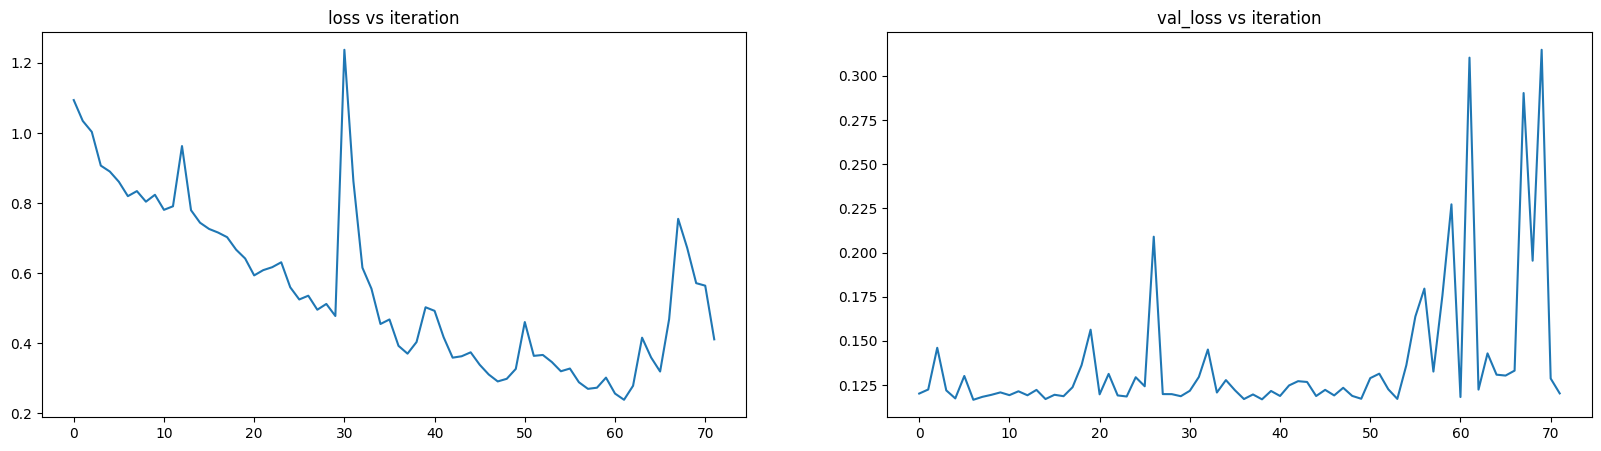

None




iteration actual: 2

Epoch 1/1000
392/392 [==============================] - 30s 52ms/step - loss: 1.0932 - val_loss: 0.1245
Epoch 2/1000
392/392 [==============================] - 18s 47ms/step - loss: 0.9716 - val_loss: 0.1344
Epoch 3/1000
392/392 [==============================] - 19s 47ms/step - loss: 0.9463 - val_loss: 0.1256
Epoch 4/1000
392/392 [==============================] - 18s 47ms/step - loss: 0.8857 - val_loss: 0.1201
Epoch 5/1000
392/392 [==============================] - 19s 48ms/step - loss: 0.9666 - val_loss: 0.1276
Epoch 6/1000
392/392 [==============================] - 18s 47ms/step - loss: 0.9383 - val_loss: 0.1312
Epoch 7/1000
392/392 [==============================] - 19s 48ms/step - loss: 0.9585 - val_loss: 0.4199
Epoch 8/1000
392/392 [==============================] - 19s 48ms/step - loss: 0.9793 - val_loss: 0.1266
Epoch 9/1000
392/392 [==============================] - 18s 47ms/step - loss: 0.8836 - val_loss: 0.1232
Epoch 10/1000
392/392 [=================

KeyboardInterrupt: 

In [48]:
best_model = None
best_hist = None
best_loss = float("inf")
best_val_loss = float("inf")
loss = float("inf")

VAL_LOSS = list()
LOSS = list()

sizes = [8, 16, 32, 64, 128]

for i in range(5):
    print(f"iteration actual: {i+1}\n")
    
    model = simpleRNN_gru_dropout_model(64) #sizes[i % len(sizes)])
    hist = model.fit(
                    X_train, y_train,
                    epochs = 1000,
                    validation_data = (X_test,y_test),
                    batch_size = 32,
                    callbacks = [tf.keras.callbacks.EarlyStopping("loss", patience = 10, restore_best_weights = True)])

    loss = model.evaluate(X_train, y_train, verbose = 0)
    val_loss = model.evaluate(X_test,y_test, verbose = 0)
    LOSS.append(loss)
    VAL_LOSS.append(val_loss)
      
    if loss < best_loss:
        best_model = model
        best_loss = loss
        best_hist = hist
        best_val_loss = val_loss
    
    clear_output(wait=True)
    
    print(f"BEST LOSS: {best_loss}")
    print(f"Iteration {i+1} - Loss: {loss} \n")
    
    fig, (p1,p2) = plt.subplots(1,2, figsize = (20,5) )
    p1.plot(hist.history["loss"])
    p1.set_title("loss vs iteration")
    p2.plot(hist.history["val_loss"])
    p2.set_title("val_loss vs iteration")
    
    display(plt.show())
    plt.close()
    
    print("\n\n")
    
clear_output(wait=True)

print(f"BEST LOSS: {best_loss}")

f,(ax1,ax2) = plt.subplots(1,2,figsize  = (20,5))
ax1.plot(best_hist.history["loss"]);
ax1.set_title("loss vs iteration")
ax2.plot(best_hist.history["val_loss"])
ax2.set_title("val_loss vs iteration")

In [49]:
dd = pd.DataFrame({"loss" : LOSS, "val_loss" : VAL_LOSS}).sort_values(by = 'loss')
dd.index.name = "iter"

dd

,loss,val_loss
iter,,
0,0.234196,0.310356


In [50]:
best_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 30, 64)            4608      
                                                                 
 dropout_4 (Dropout)         (None, 30, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 30, 64)            33024     
                                                                 
 dropout_5 (Dropout)         (None, 30, 64)            0         
                                                                 
 gru_2 (GRU)                 (None, 64)                24960     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                

In [51]:
y_pred = best_model.predict(X_test)

y_pred = y_pred*y_std + y_mean
y_pred = [y_pred[j][0] for j in range(len(y_pred))]

D_test["pred"] = y_pred

62/62 [==============================] - 3s 17ms/step


In [52]:
pd.pivot_table(D_test,values = ["Importe USD", "pred"], index = ["anno_Oc"],columns = ["anno_pago"], aggfunc= np.sum, fill_value = "")

Importe USD                      pred              
anno_pago      2021.0      2022.0        2021.0        2022.0
anno_Oc                                                      
2008.0            0.0        0.00    7923.20752  7.185196e+04
2009.0            0.0        0.00  24371.308594  2.277072e+05
2010.0            0.0        0.00   25253.53125  2.392634e+05
2011.0            0.0        0.00  26163.208984  2.510781e+05
2012.0            0.0        0.00  27014.666016  2.625014e+05
2013.0        1152.31        0.00  27894.388672  2.742549e+05
2014.0          72.16        0.00  28764.966797  2.858580e+05
2015.0            0.0        0.00  29635.167969  2.975153e+05
2016.0            0.0     1208.91  30500.521484  3.091900e+05
2017.0         107.26      637.73  31663.740234  3.234643e+05
2018.0         481.48   885306.10  32355.476562  1.999470e+06
2019.0       26372.82   112861.48  35407.128906  3.689182e+05
2020.0       32119.25   126324.94  35256.589844  3.657389e+05
2021.0        81829.5  1058429.37  34118.496094  7.489039e+05
2022.0                  688171.05                2.044407e+05

In [53]:
pd.pivot_table(D_test,values = ["Importe USD"], index = ["anno_Oc","Mes_Oc"],columns = ["anno_pago", "Mes_pago"], aggfunc= np.sum, fill_value = "")

Importe USD                                                    \
anno_pago           2021.0    2022.0                                           
Mes_pago                12        1          2        3         4         5    
anno_Oc Mes_Oc                                                                 
2008.0  9              0.0       0.0        0.0      0.0       0.0       0.0   
        10             0.0       0.0        0.0      0.0       0.0       0.0   
        11             0.0       0.0        0.0      0.0       0.0       0.0   
        12             0.0       0.0        0.0      0.0       0.0       0.0   
2009.0  1              0.0       0.0        0.0      0.0       0.0       0.0   
        2              0.0       0.0        0.0      0.0       0.0       0.0   
        3              0.0       0.0        0.0      0.0       0.0       0.0   
        4              0.0       0.0        0.0      0.0       0.0       0.0   
        5              0.0       0.0        0.0      0.0       0.0       0.0   
        6              0.0       0.0        0.0      0.0       0.0       0.0   
        7              0.0       0.0        0.0      0.0       0.0       0.0   
        8              0.0       0.0        0.0      0.0       0.0       0.0   
        9              0.0       0.0        0.0      0.0       0.0       0.0   
        10             0.0       0.0        0.0      0.0       0.0       0.0   
        11             0.0       0.0        0.0      0.0       0.0       0.0   
        12             0.0       0.0        0.0      0.0       0.0       0.0   
2010.0  1              0.0       0.0        0.0      0.0       0.0       0.0   
        2              0.0       0.0        0.0      0.0       0.0       0.0   
        3              0.0       0.0        0.0      0.0       0.0       0.0   
        4              0.0       0.0        0.0      0.0       0.0       0.0   
        5              0.0       0.0        0.0      0.0       0.0       0.0   
        6              0.0       0.0        0.0      0.0       0.0       0.0   
        7              0.0       0.0        0.0      0.0       0.0       0.0   
        8              0.0       0.0        0.0      0.0       0.0       0.0   
        9              0.0       0.0        0.0      0.0       0.0       0.0   
        10             0.0       0.0        0.0      0.0       0.0       0.0   
        11             0.0       0.0        0.0      0.0       0.0       0.0   
        12             0.0       0.0        0.0      0.0       0.0       0.0   
2011.0  1              0.0       0.0        0.0      0.0       0.0       0.0   
        2              0.0       0.0        0.0      0.0       0.0       0.0   
        3              0.0       0.0        0.0      0.0       0.0       0.0   
        4              0.0       0.0        0.0      0.0       0.0       0.0   
        5              0.0       0.0        0.0      0.0       0.0       0.0   
        6              0.0       0.0        0.0      0.0       0.0       0.0   
        7              0.0       0.0        0.0      0.0       0.0       0.0   
        8              0.0       0.0        0.0      0.0       0.0       0.0   
        9              0.0       0.0        0.0      0.0       0.0       0.0   
        10             0.0       0.0        0.0      0.0       0.0       0.0   
        11             0.0       0.0        0.0      0.0       0.0       0.0   
        12             0.0       0.0        0.0      0.0       0.0       0.0   
2012.0  1              0.0       0.0        0.0      0.0       0.0       0.0   
        2              0.0       0.0        0.0      0.0       0.0       0.0   
        3              0.0       0.0        0.0      0.0       0.0       0.0   
        4              0.0       0.0        0.0      0.0       0.0       0.0   
        5              0.0       0.0        0.0      0.0       0.0       0.0   
        6              0.0       0.0        0.0      0.0       0.0       0.0   
        7      

In [54]:
pd.pivot_table(D_test,values = ["pred"], index = ["anno_Oc","Mes_Oc"],columns = ["anno_pago", "Mes_pago"], aggfunc= np.sum, fill_value = "")

pred                                          \
anno_pago            2021.0       2022.0                              
Mes_pago                 12           1            2             3    
anno_Oc Mes_Oc                                                        
2008.0  9        1373.70459   1822.20874  2057.599121   2032.377197   
        10      1732.535645     2169.625  2372.352051   2318.138184   
        11      2177.285645  2573.324219   2772.02124    2759.08374   
        12      2639.681641  3071.480957  3540.663574   3760.669922   
2009.0  1       2894.037109    3228.2229  3479.971191   3532.679688   
        2       2865.468262  3109.983398  3269.919922   3206.160889   
        3       2658.019531  2893.980469   3030.43457   3016.217529   
        4       2229.371582  2498.664062  2624.542725   2662.806396   
        5       1717.283936  2018.632812  2176.793213   2237.984375   
        6       1359.287842  1696.544922  1868.822754   1943.417603   
        7       1207.720947  1557.527344  1764.962891   1839.507935   
        8       1176.835938  1595.851807  1861.162231   1889.897949   
        9       1445.508057  1893.639282  2129.617676   2105.488525   
        10      1812.153809  2247.701172  2448.660156   2397.532715   
        11      2266.223389   2658.20166  2857.100586   2849.995361   
        12      2739.398926   3179.88916  3668.561279   3923.847168   
2010.0  1       2982.207031  3316.633789  3567.772461   3633.965088   
        2       2942.520508  3189.239258  3351.741699   3287.754883   
        3       2732.228516  2970.540527  3111.360596   3093.039795   
        4        2303.45459  2572.107422  2704.646484    2739.65918   
        5       1782.630737  2085.996582  2249.132324   2312.086914   
        6       1410.753662  1749.886963  1928.712524   2007.775391   
        7       1255.686035  1607.800293   1823.53833   1900.725098   
        8       1240.404053  1659.973145  1928.996582   1956.799683   
        9       1518.020752  1965.538208  2201.935059   2178.638916   
        10      1892.166626   2325.78125  2524.708496   2476.589111   
        11      2355.117676  2742.916992  2942.294922   2941.618164   
        12      2838.341797  3287.796143  3793.457275   4076.702393   
2011.0  1       3096.514404   3478.26001  3624.803711   3623.068604   
        2       3018.204102  3267.423584  3432.916992   3368.140625   
        3       2805.443848  3046.373779  3191.429688   3169.083496   
        4       2377.028076  2645.116699  2784.169434   2815.653076   
        5       1848.825439  2153.683594  2321.862305   2386.044189   
        6       1463.388428  1804.334839   1989.92749   2072.929199   
        7       1304.742188  1659.474121   1883.22644   1962.838013   
        8       1305.048096  1725.022705  1997.566406   2024.193848   
        9       1591.264404  2037.875366  2274.539062   2251.813232   
        10      1972.563232  2403.827148  2600.467773   2555.315918   
        11      2444.003662  2827.495117  3027.669189   3033.915771   
        12      2936.183105   3394.56665  3914.518555   4217.650391   
2012.0  1       3151.931885  3487.150391  3738.445312   3819.418945   
        2       3092.460693  3344.542969  3513.478516   3447.396484   
        3        2877.59668  3121.445801  3270.626953   3244.357422   
        4       2449.961426  2717.657715  2863.039062   2890.761963   
        5       1915.701294  2221.626465   2394.93457   2459.816895   
        6       1517.185791  1859.869507  2052.430664   2138.831055   
        7       1354.932617  1712.594727  1944.024902   2025.859619   
        8        1370.75708  1790.996216  2066.858398    2092.07373   
        9       1665.247803  2110.624512  2347.405273   2325.009277   
        10       2053.34375  2481.781494  2675.932617   2633.736816   
        11      2532.928467  2911.973633  3113.297363   3126.807373   
        12      3032.618652  3499.602051  4031.072998   4346.025391   
2013.0  1       3233.089844  3569.282227   3821

In [ ]:
# best_model.save("simpleRNN_GRU_dropout_model_v2.h5")

# 



# SimpleRNNx2

In [55]:
def simpleRNNx2():

    inputs = tf.keras.layers.Input(shape=(n_steps, n_features))

    #This is going to be a RNN simple cell

    x = tf.keras.layers.SimpleRNN(64, return_sequences=True)(inputs)
    x = tf.keras.layers.Dropout(0.4)(x)
    x = tf.keras.layers.SimpleRNN(32)(x)
    x = tf.keras.layers.Dropout(0.4)(x)
    x = tf.keras.layers.Dense(64, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.4)(x)
    outputs = tf.keras.layers.Dense(1)(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
        loss = tf.keras.losses.MeanSquaredError(),
    )

    return model

BEST LOSS: 0.3431416451931


Text(0.5, 1.0, 'val_loss vs iteration')

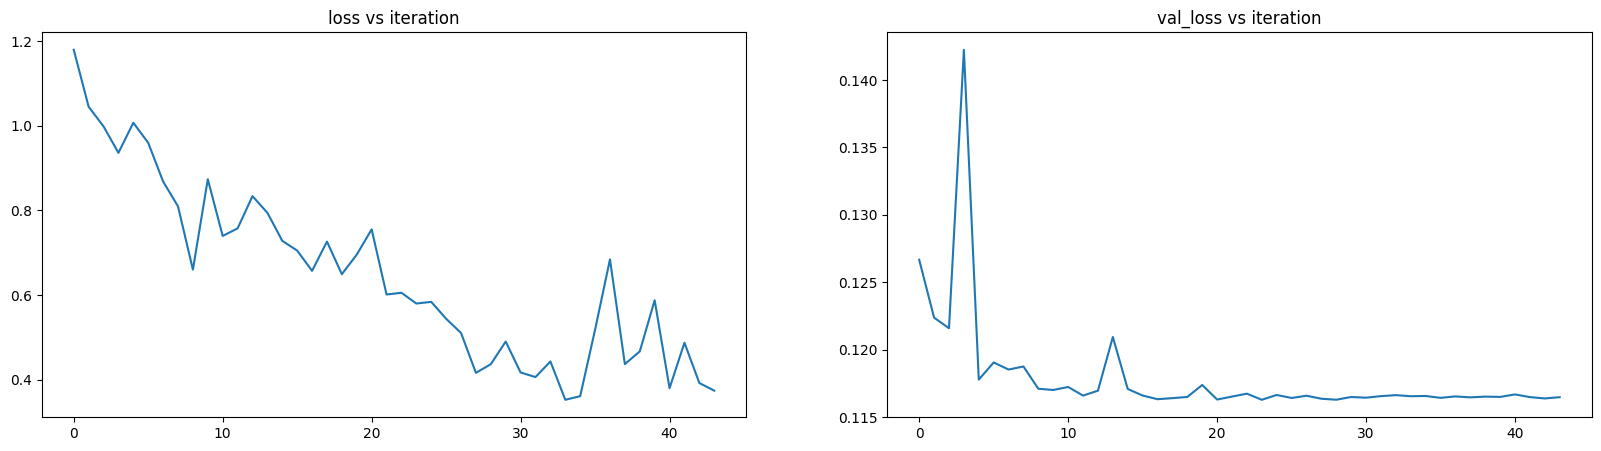

In [56]:
best_model = None
best_hist = None
best_loss = float("inf")
best_val_loss = float("inf")
loss = float("inf")

VAL_LOSS = list()
LOSS = list()

sizes = [8, 16, 32, 64, 128]

for i in range(2):
    print(f"iteration actual: {i+1}\n")
    
    model = simpleRNNx2()
    hist = model.fit(
                    X_train, y_train,
                    epochs = 1000,
                    validation_data = (X_test,y_test),
                    batch_size = 32,
                    callbacks = [tf.keras.callbacks.EarlyStopping("loss", patience = 10, restore_best_weights = True)])

    loss = model.evaluate(X_train, y_train, verbose = 0)
    val_loss = model.evaluate(X_test,y_test, verbose = 0)
    LOSS.append(loss)
    VAL_LOSS.append(val_loss)
      
    if loss < best_loss:
        best_model = model
        best_loss = loss
        best_hist = hist
        best_val_loss = val_loss
    
    clear_output(wait=True)
    
    print(f"BEST LOSS: {best_loss}")
    print(f"BEST VAL LOSS: {best_val_loss}")
    print(f"Iteration {i+1} - Loss: {loss}   val_loss : {val_loss} \n ")
    
    fig, (p1,p2) = plt.subplots(1,2, figsize = (20,5) )
    p1.plot(hist.history["loss"]); p1.set_title("loss vs iteration")
    p2.plot(hist.history["val_loss"]); p2.set_title("val_loss vs iteration")
    
    display(plt.show())
    plt.close()
    
    print("\n\n")
    
clear_output(wait=True)

print(f"BEST LOSS: {best_loss}")

f,(ax1,ax2) = plt.subplots(1,2,figsize  = (20,5))
ax1.plot(best_hist.history["loss"]); ax1.set_title("loss vs iteration")
ax2.plot(best_hist.history["val_loss"]); ax2.set_title("val_loss vs iteration")

In [57]:
dd = pd.DataFrame({"loss" : LOSS, "val_loss" : VAL_LOSS}).sort_values(by = 'loss')
dd.index.name = "iter"

dd

,loss,val_loss
iter,,
0,0.343142,0.116559
1,0.718481,0.117858


In [58]:
best_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30, 7)]           0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 30, 64)            4608      
                                                                 
 dropout_10 (Dropout)        (None, 30, 64)            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dropout_12 (Dropout)        (None, 64)                0     

In [59]:
# best_model.save("simpleRNNx2_v2.h5")

In [60]:
y_pred = best_model.predict(X_test)

y_pred = y_pred*y_std + y_mean
y_pred = [y_pred[j][0] for j in range(len(y_pred))]

D_test["pred"] = y_pred

62/62 [==============================] - 1s 6ms/step


In [61]:
pd.pivot_table(D_test,values = ["Importe USD", "pred"], index = ["anno_Oc"],columns = ["anno_pago"], aggfunc= np.sum, fill_value = "")

Importe USD                      pred              
anno_pago      2021.0      2022.0        2021.0        2022.0
anno_Oc                                                      
2008.0            0.0        0.00  11040.238281  121442.62500
2009.0            0.0        0.00  33120.714844  364327.87500
2010.0            0.0        0.00  33120.714844  364327.87500
2011.0            0.0        0.00  33120.714844  364327.87500
2012.0            0.0        0.00  33120.714844  364327.87500
2013.0        1152.31        0.00  33120.714844  364327.87500
2014.0          72.16        0.00  33120.714844  364327.87500
2015.0            0.0        0.00  33120.714844  364327.87500
2016.0            0.0     1208.91  33120.714844  364327.87500
2017.0         107.26      637.73  33120.714844  364327.87500
2018.0         481.48   885306.10  33120.714844  365215.96875
2019.0       26372.82   112861.48  33120.714844  364327.87500
2020.0       32119.25   126324.94  33120.714844  364327.87500
2021.0        81829.5  1058429.37   30360.65625  364327.87500
2022.0                  688171.05                151803.28125

In [ ]:
pd.pivot_table(D_test ,values = ["Importe USD"], index = ["anno_Oc","Mes_Oc"],columns = ["anno_pago", "Mes_pago"], aggfunc= np.sum, fill_value = "")

In [ ]:
pd.pivot_table(D_test,values = ["pred"], index = ["anno_Oc","Mes_Oc"],columns = ["anno_pago", "Mes_pago"], aggfunc= np.sum, fill_value = "")